In [135]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [136]:
version = 16
zarr_path = f"../data/memory/memory_v{version}.zarr"
data = zarr.open(zarr_path, mode='r')
if version == 6 or version == 7 or version == 8 or version == 9 or version == 13 or version == 16:
    env = 4
elif version == 5:
    env = 3
else:
    env = 2

In [137]:
zarr_path = f"../data/memory/test60gmts.zarr"
data = zarr.open(zarr_path, mode='r')

In [138]:
states = np.array(data['data']['state'])
episode_ends = np.array(data['meta']['episode_ends'])

start_idx = 0
episodes = []
for end_idx in episode_ends:
    episodes.append(states[start_idx:end_idx])
    start_idx = end_idx

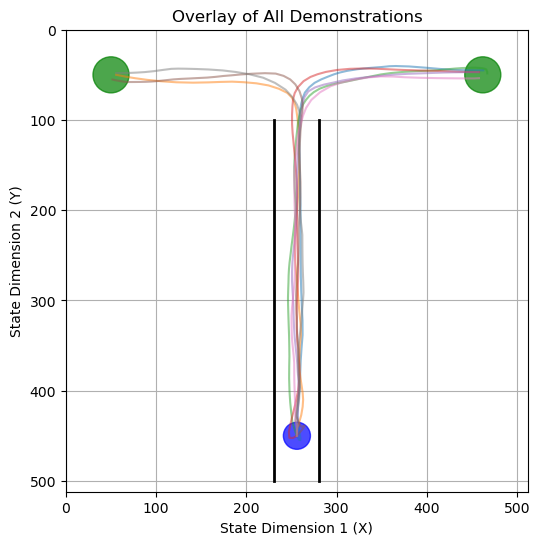

In [139]:
# Plotting
plt.figure(figsize=(10, 6))
for episode in episodes:
    plt.plot(episode[:, 0], episode[:, 1], alpha=0.5)
    
if env == 2:
    plt.plot([206, 206], [450, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([306, 306], [450, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 400), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((400, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((112, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)
elif env==4:
    plt.plot([231, 231], [500, 100], color='black', linewidth=2, label="Wall 1")
    plt.plot([281, 281], [500, 100], color='black', linewidth=2, label="Wall 2")

    ax = plt.gca()
    circle1 = patches.Circle((256, 450), 15, color='blue', alpha=0.7, label="Circle 1")
    ax.add_patch(circle1)
    circle2 = patches.Circle((462, 50), 20, color='green', alpha=0.7, label="Circle 2")
    ax.add_patch(circle2)
    circle3 = patches.Circle((50, 50), 20, color='green', alpha=0.7, label="Circle 3")
    ax.add_patch(circle3)    
else:
    pass
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Overlay of All Demonstrations")
plt.xlabel("State Dimension 1 (X)")
plt.ylabel("State Dimension 2 (Y)")
plt.grid(True)
#plt.savefig(f"overlay_plot_{version}_without_goal_knowledge.png", dpi=300)
plt.show()